In [1]:
import subprocess

work_dir = "."

proc = subprocess.run(
    ["HParse", "grammar", "wordnet"],
    cwd=work_dir,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True  # return stdout/stderr as strings
)

# print the tool’s output or error
if proc.returncode == 0:
    print('all good???')
    print(proc.stdout)
else:
    print(f"✗ HParse failed (exit code {proc.returncode}):\n{proc.stderr}")

proc = subprocess.run(
    [
        "HDMan",
        "-m",                # merge
        "-w", "wlist",       # output word list
        "-n", "models0",     # output monophone list
        "-l", "dlog",        # logging file
        "dict",              # pronunciation dictionary
        "lexicon"            # lexicon name (without extension)
    ],
    cwd=work_dir,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)
if proc.returncode == 0:
    print("HDMan output:\n", proc.stdout)
else:
    print(f"✗ HDMan failed (exit {proc.returncode}):\n{proc.stderr}")

proc = subprocess.run(
    [
        "HCopy",
        "-T", "1",                       # debug trace level
        "-C", "ParamConfig",             # feature extraction config # used to be ParamConfig
        "-S", "param.list"               # script file listing wav->mfcc mappings
    ],
    cwd=work_dir,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

if proc.returncode == 0:
    print("HCopy output:\n", proc.stdout)
else:
    print(f"✗ HCopy failed (exit {proc.returncode}):\n{proc.stderr}")

all good???

HDMan output:
 
HCopy output:
 data/2501/wMESIC_p2501_s3.wav -> data/2501/wMESIC_p2501_s3.mfcc 
data/2501/wZA-POSLEDNI_p2501_s4.wav -> data/2501/wZA-POSLEDNI_p2501_s4.mfcc 
data/2501/wV-INTERVALU_p2501_s5.wav -> data/2501/wV-INTERVALU_p2501_s5.mfcc 
data/2501/wROK_p2501_s4.wav -> data/2501/wROK_p2501_s4.mfcc 
data/2501/wTYDEN_p2501_s3.wav -> data/2501/wTYDEN_p2501_s3.mfcc 
data/2501/wHODIN_p2501_s3.wav -> data/2501/wHODIN_p2501_s3.mfcc 
data/2501/wHODIN_p2501_s2.wav -> data/2501/wHODIN_p2501_s2.mfcc 
data/2501/wTESLA_p2501_s3.wav -> data/2501/wTESLA_p2501_s3.mfcc 
data/2501/wDNU_p2501_s4.wav -> data/2501/wDNU_p2501_s4.mfcc 
data/2501/wTYDEN_p2501_s4.wav -> data/2501/wTYDEN_p2501_s4.mfcc 
data/2501/wZOBRAZ_p2501_s2.wav -> data/2501/wZOBRAZ_p2501_s2.mfcc 
data/2501/wTYDEN_p2501_s5.wav -> data/2501/wTYDEN_p2501_s5.mfcc 
data/2501/wTYDEN_p2501_s2.wav -> data/2501/wTYDEN_p2501_s2.mfcc 
data/2501/wV-INTERVALU_p2501_s2.wav -> data/2501/wV-INTERVALU_p2501_s2.mfcc 
data/2501/wHODIN

In [17]:
!HLEd -X phones.lst -i train‐phones.mlf expand.led train.mlf


In [2]:
# 1) build 8‐state prototype
proc8 = subprocess.run(
    [
        "HCompV",
        "-C", "TrainConfig",
        "-f", "0.01",
        "-m",
        "-S", "train.scp",
        "-M", "hmm0",
        "proto-8s-39f"
    ],
    cwd=work_dir,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

if proc8.returncode == 0:
    print("✔ HCompV proto-8s-39f output:\n", proc8.stdout)
else:
    print(f"✗ HCompV proto-8s-39f failed (exit {proc8.returncode}):\n{proc8.stderr}")


# 2) build 3‐state prototype
proc3 = subprocess.run(
    [
        "HCompV",
        "-C", "TrainConfig",
        "-f", "0.01",
        "-m",
        "-S", "train.scp",
        "-M", "hmm0",
        "proto-3s-39f"
    ],
    cwd=work_dir,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

if proc3.returncode == 0:
    print("✔ HCompV proto-3s-39f output:\n", proc3.stdout)
else:
    print(f"✗ HCompV proto-3s-39f failed (exit {proc3.returncode}):\n{proc3.stderr}")

# the flags that never change
common = [
    "HERest",
    "-C", "TrainConfig",
    "-I", "train.mlf",
    "-t", "250.0", "150.0", "1000.0",
    "-S", "train.scp"
]

for i in range(6):
    in_hmm  = f"hmm{i}/hmmdefs"
    out_hmm = f"hmm{i+1}"
    cmd = common + ["-H", in_hmm, "-M", out_hmm, "models0"]

    print(f"\n>>> Pass {i+1}: {' '.join(cmd)}")
    proc = subprocess.run(
        cmd,
        cwd=work_dir,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    if proc.returncode == 0:
        print(f"✔ Pass {i+1} succeeded:\n{proc.stdout}")
    else:
        print(f"✗ Pass {i+1} failed (exit {proc.returncode}):\n{proc.stderr}")
        break
else:
    print("\n✅ All 6 HERest passes completed successfully.")

✔ HCompV proto-8s-39f output:
 
✔ HCompV proto-3s-39f output:
 

>>> Pass 1: HERest -C TrainConfig -I train.mlf -t 250.0 150.0 1000.0 -S train.scp -H hmm0/hmmdefs -M hmm1 models0
✔ Pass 1 succeeded:
Pruning-On[250.0 150.0 1000.0]


>>> Pass 2: HERest -C TrainConfig -I train.mlf -t 250.0 150.0 1000.0 -S train.scp -H hmm1/hmmdefs -M hmm2 models0
✔ Pass 2 succeeded:
Pruning-On[250.0 150.0 1000.0]


>>> Pass 3: HERest -C TrainConfig -I train.mlf -t 250.0 150.0 1000.0 -S train.scp -H hmm2/hmmdefs -M hmm3 models0
✔ Pass 3 succeeded:
Pruning-On[250.0 150.0 1000.0]


>>> Pass 4: HERest -C TrainConfig -I train.mlf -t 250.0 150.0 1000.0 -S train.scp -H hmm3/hmmdefs -M hmm4 models0
✔ Pass 4 succeeded:
Pruning-On[250.0 150.0 1000.0]


>>> Pass 5: HERest -C TrainConfig -I train.mlf -t 250.0 150.0 1000.0 -S train.scp -H hmm4/hmmdefs -M hmm5 models0
✔ Pass 5 succeeded:
Pruning-On[250.0 150.0 1000.0]


>>> Pass 6: HERest -C TrainConfig -I train.mlf -t 250.0 150.0 1000.0 -S train.scp -H hmm5/hmmdefs -M

In [48]:
!pwd
!ls data/

/root/htk/fun/fun
2501  2502  fix


In [60]:
!./testt.sh recordings/sentence_20250611_163339.wav

recordings/sentence_20250611_163339.wav -> /tmp/htk.HDDJJY.mfc 
Read 12 physical / 12 logical HMMs
Read lattice with 18 nodes / 22 arcs
Created network with 33 nodes / 37 links
File: /tmp/htk.HDDJJY.mfc
SENT-START ZOBRAZ APPLE ZA-POSLEDNI MESIC V-INTERVALU MESICU SENT-END  ==  [951 frames] -66.9662 [Ac=-63684.9 LM=0.0] (Act=30.0)
0 300000 11200000 29000000 48600000 59500000 84200000 94800000 


In [37]:
!./test_all.sh

=== Recognizing: data/2501_test/uZOBRAZ_APPLE_ZA-POSLEDNI_MESIC_V-INTERVALU_DNU_p2501_test_s1.wav ===
data/2501_test/uZOBRAZ_APPLE_ZA-POSLEDNI_MESIC_V-INTERVALU_DNU_p2501_test_s1.wav 
    -> /tmp/htk.CQahiJ.mfc 
Read 11 physical / 11 logical HMMs
Read lattice with 17 nodes / 20 arcs
Created network with 31 nodes / 34 links
File: /tmp/htk.CQahiJ.mfc
SENT-START ZOBRAZ APPLE ZA-POSLEDNI MESIC V-INTERVALU HODIN SENT-END  ==  [839 frames] -68.3839 [Ac=-57374.1 LM=0.0] (Act=28.0)
0 1400000 10100000 27300000 45800000 60300000 69300000 72000000 
=== Recognizing: data/2501_test/uZOBRAZ_APPLE_ZA-POSLEDNI_MESIC_V-INTERVALU_HODIN_p2501_test_s1.wav ===
data/2501_test/uZOBRAZ_APPLE_ZA-POSLEDNI_MESIC_V-INTERVALU_HODIN_p2501_test_s1.wav 
    -> /tmp/htk.dm330Y.mfc 
Read 11 physical / 11 logical HMMs
Read lattice with 17 nodes / 20 arcs
Created network with 31 nodes / 34 links
File: /tmp/htk.dm330Y.mfc
SENT-START ZOBRAZ APPLE ZA-POSLEDNI MESIC V-INTERVALU HODIN SENT-END  ==  [793 frames] -70.9750 [Ac=-

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Map your grammar words to Yahoo Finance ticker and time periods
STOCK_MAP = {
    "TESLA": "TSLA",
    "APPLE": "AAPL"
}
PERIOD_MAP = {
    "TYDEN": "7d",
    "MESIC": "1mo",
    "ROK": "1y"
}
INTERVAL_MAP = {
    "DNU": "1d",
    "HODIN": "1h",
    "MESICU": "1mo"
}

def plot_from_sentence(sentence):
    words = sentence.split()
    stock = None
    period = None
    interval = None
    for word in words:
        if word in STOCK_MAP:
            stock = STOCK_MAP[word]
        elif word in PERIOD_MAP:
            period = PERIOD_MAP[word]
        elif word in INTERVAL_MAP:
            interval = INTERVAL_MAP[word]

    if not (stock and period and interval):
        print("Error: Could not parse stock/period/interval from input.")
        return

    # Download and plot
    data = yf.download(stock, period=period, interval=interval)
    if data.empty:
        print("No data found.")
        return

    plt.figure(figsize=(10,4))
    plt.plot(data.index, data["Close"])
    plt.title(f"{stock} Close Price")
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.tight_layout()
    plt.show()

Processing: recordings/sentence_20250612_103215.wav
Extracted sentence for sentence_20250612_103215.wav:
ZOBRAZ TESLA ZA-POSLEDNI ROK V-INTERVALU HODIN


/tmp/ipykernel_575/1068908075.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


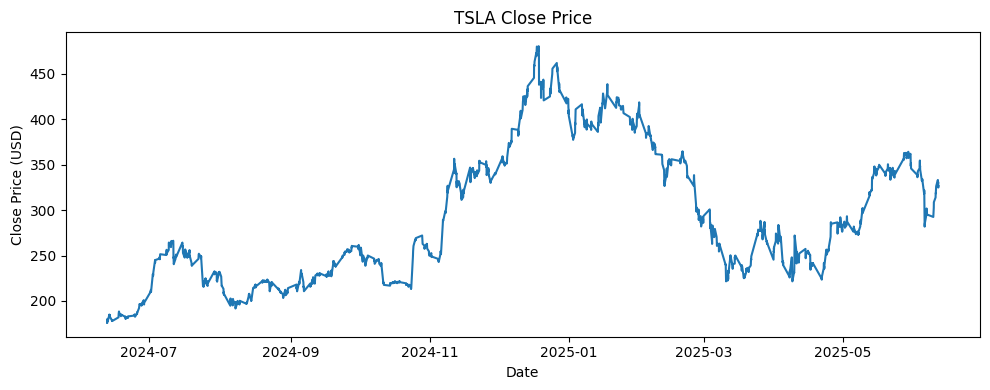

Processing: recordings/sentence_20250612_103228.wav
Extracted sentence for sentence_20250612_103228.wav:
ZOBRAZ APPLE ZA-POSLEDNI ROK V-INTERVALU DNU


/tmp/ipykernel_575/1068908075.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


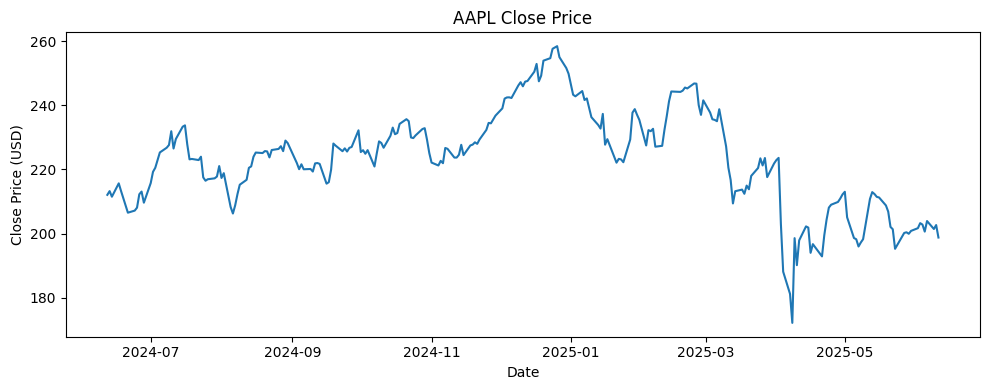

KeyboardInterrupt: 

In [2]:
import os
import time
import subprocess
import re

RECORDINGS_DIR = 'recordings' 
CHECK_INTERVAL = 1 

seen = set()
pattern = re.compile(r'SENT-START (.*?) SENT-END')

while True:
    files = sorted([
        f for f in os.listdir(RECORDINGS_DIR)
        if f.endswith('.wav')
    ])
    for fname in files:
        fpath = os.path.join(RECORDINGS_DIR, fname)
        if fpath not in seen:
            seen.add(fpath)
            print(f"Processing: {fpath}")
            try:
                output = subprocess.check_output(['./testt.sh', fpath], text=True)
                match = pattern.search(output)
                if match:
                    sentence = match.group(1).strip()
                    print(f"Extracted sentence for {fname}:\n{sentence}")
                    plot_from_sentence(sentence)
                
                else:
                    print(f"No sentence found in output for {fname}.")
            except subprocess.CalledProcessError as e:
                print(f"Error running testt.sh for {fname}:\n{e.output}")
    time.sleep(CHECK_INTERVAL)
